In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# load dataset
df = pd.read_csv('diabetes_updated.csv')

# define dependent variable
y = df['Outcome']

# define independent variables
X = df[['Pregnancies', 'Glucose', 'SkinThickness', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]


In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
# import the train_test_split functionality from sklearn
from sklearn.model_selection import train_test_split

# pass the x and y varialbles in the function and get the train and test
# sets for the X and y variables
# the test size parameter determines how the data is split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y)

In [40]:
# compare train and test sets for y
print("y_train {}".format(y_train))
print("y_test {}".format(y_test))

y_train 206    1
69     0
711    0
28     0
709    1
      ..
404    1
197    1
447    0
41     0
451    1
Name: Outcome, Length: 614, dtype: int64
y_test 305    0
584    1
57     0
680    0
180    0
      ..
606    1
207    1
756    0
128    1
696    1
Name: Outcome, Length: 154, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

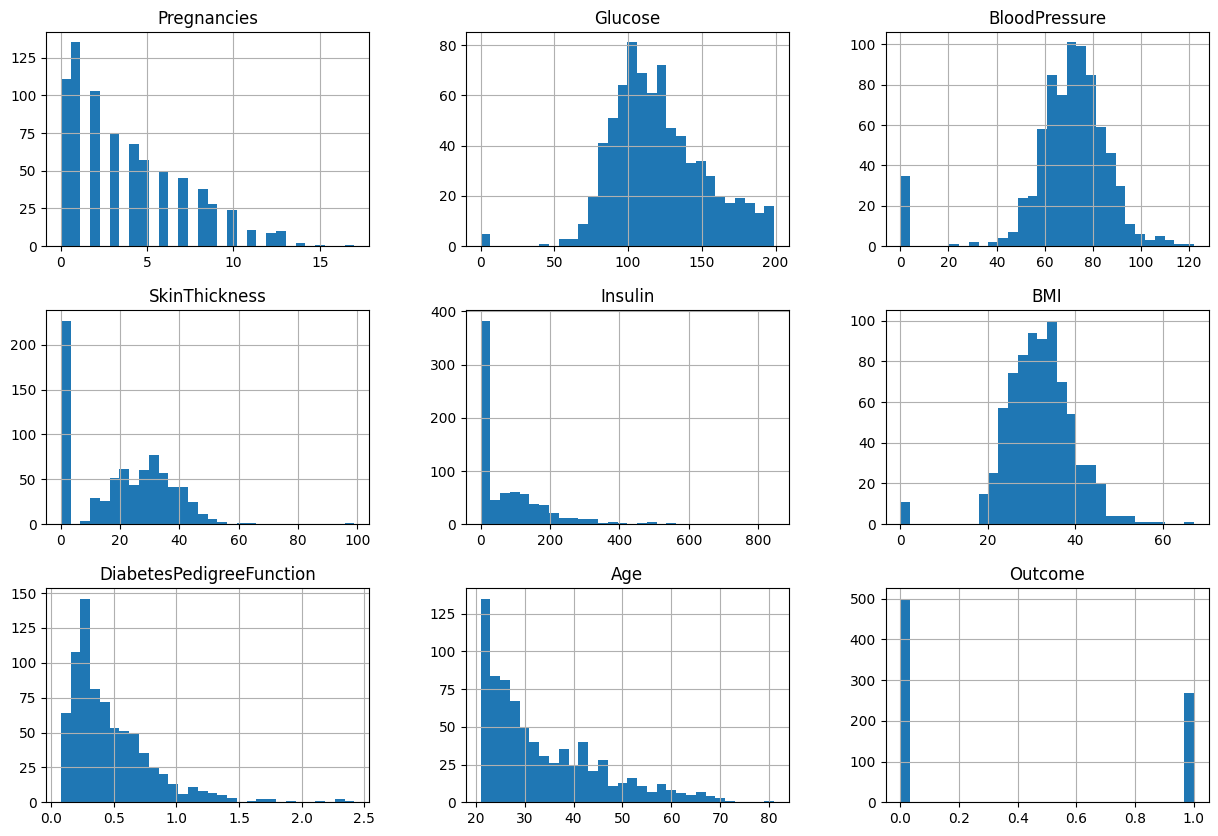

In [41]:
# plot a histogram to understand the distribution of each feature
df.hist(bins=30, figsize=(15, 10))
plt.show

In [42]:
# train the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)

# test the data (using the same scale fitted on training data)
X_test_scaled = scaler.transform(X_test)

In [43]:
# fit a multiple regression model
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)

LinearRegression()

In [44]:
# print out the intercept and coefficients of the trained model
print("Intercept:", multiple_model.intercept_)
print("Coefficients:", multiple_model.coef_)

# print coefficients with feature names
coefficients = pd.DataFrame(multiple_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Intercept: -0.8623895020376264
Coefficients: [ 2.47424194e-02  5.65720847e-03  1.46665311e-04 -1.98184732e-03
 -1.31746291e-04  1.47333623e-02  1.34345668e-01  1.26151504e-03]
                          Coefficient
Pregnancies                  0.024742
Glucose                      0.005657
SkinThickness                0.000147
BloodPressure               -0.001982
Insulin                     -0.000132
BMI                          0.014733
DiabetesPedigreeFunction     0.134346
Age                          0.001262


     Pregnancies  Glucose  SkinThickness  BloodPressure  Insulin   BMI  \
305            2      120             37             76      105  39.7   
584            8      124             24             76      600  28.7   
57             0      100             60             88      110  46.8   
680            2       56             28             56       45  24.2   
180            6       87              0             80        0  23.2   
..           ...      ...            ...            ...      ...   ...   
606            1      181             42             78      293  40.0   
207            5      162              0            104        0  37.7   
756            7      137             41             90        0  32.0   
128            1      117             24             88      145  34.5   
696            3      169             19             74      125  29.9   

     DiabetesPedigreeFunction  Age  Actual  Predicted  
305                     0.215   29       0   0.357316  

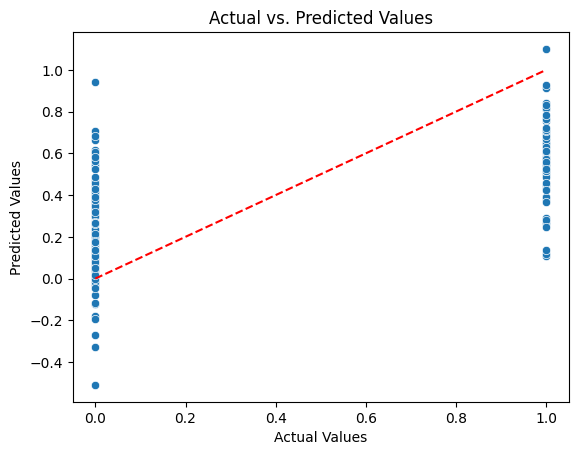

In [45]:
# generate predictions for the test set
y_pred = multiple_model.predict(X_test)

# compare the values used to make these predictions to the ones in the original diabetes data set
# create a DataFrame to compare original and predicted values
comparison_df = X_test.copy()
comparison_df['Actual'] = y_test.values
comparison_df['Predicted'] = y_pred
print(comparison_df)

# make the interpretation of our predictions more meaningful
# scatter plot to compare actual vs. predicted values
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--')  # line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [46]:
# compute R-squared for the model on the test set
from sklearn.metrics import r2_score

R_squared = r2_score(y_test, y_pred)
print("R-squared (using r2_score):", R_squared)

R-squared (using r2_score): 0.3339646251086974
